# Airbnb Data of NYC for 2019

This is my first project for which i downloaded the airbnb dataset from kaggle, 
in this project i loaded the data into the notebook, claen it by dropping any duplicates, and try to visualize the information in form of charts 

## Import all the required libraries

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load The Data 

In [80]:
# load the sample of the data from the main dataset
df = df = pd.read_csv(r'C:\Users\chinm\Downloads\archive\AB_NYC_2019.csv')

print(df.head())

     id                                              name  host_id   
0  2539                Clean & quiet apt home by the park     2787  \
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude   
0         John            Brooklyn    Kensington  40.64749  -73.97237  \
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review   
0     Private room    149               1                  9  20

## Clean the data

In [81]:
df.drop(['host_id', 'last_review', 'name'], axis=1, inplace=True)

In [82]:
# Check for missing values",
df.isnull().sum()

id                                    0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [83]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include='number').columns
# Fill missing values with mean for numeric columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [84]:
# Check for missing values
df.isnull().sum()

id                                 0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [85]:
# Select only non-numeric columns
non_numeric_cols = df.select_dtypes(exclude='number').columns
# Fill missing values with mode for non-numeric columns
df[non_numeric_cols] = df[non_numeric_cols].fillna(df[non_numeric_cols].mode().iloc[0])

In [86]:
df.isnull().sum()

id                                0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [87]:
# Check for duplicates
df.duplicated().sum()
# Drop duplicates
df.drop_duplicates(inplace=True)

In [88]:
df.head()

,id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.210000,6,365
1,2595,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.380000,2,355
2,3647,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1.373221,1,365
3,3831,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.640000,1,194
4,5022,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.100000,1,0


In [89]:
# Get summary statistics
df.describe()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.497775,32.952519,131.622289
min,2.539000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.280000,1.000000,0.000000
50%,1.967728e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.220000,1.000000,45.000000
75%,2.915218e+07,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## Data Visualization

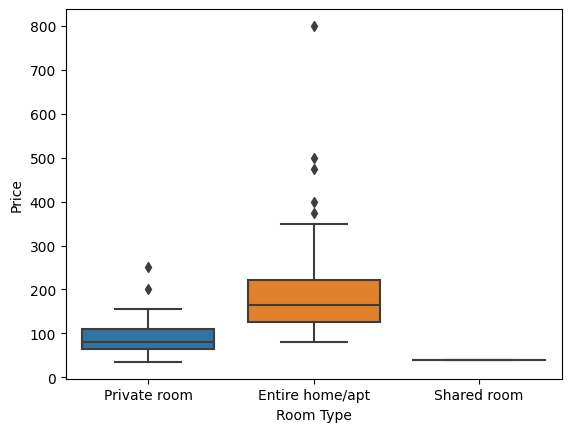

In [90]:
# Select top 200 rows
df = df.head(200)
# Create boxplot
sns.boxplot(x='room_type', y='price', data=df)
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

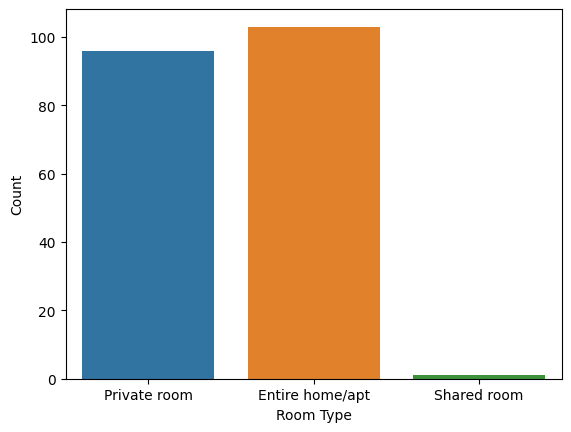

In [91]:
# Select top 200 rows
df = df.head(200)
# Plot a bar chart of the room_type column
sns.countplot(x='room_type', data=df)
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

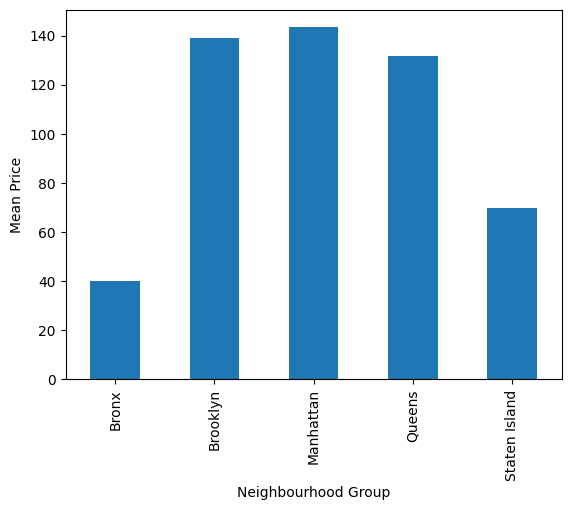

In [92]:
# Select top 200 rows
df = df.head(200)
# Group the DataFrame by neighbourhood_group
grouped = df.groupby('neighbourhood_group')
# Plot a bar chart of the mean price for each neighbourhood_group
grouped['price'].mean().plot(kind='bar')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Mean Price')
plt.show()

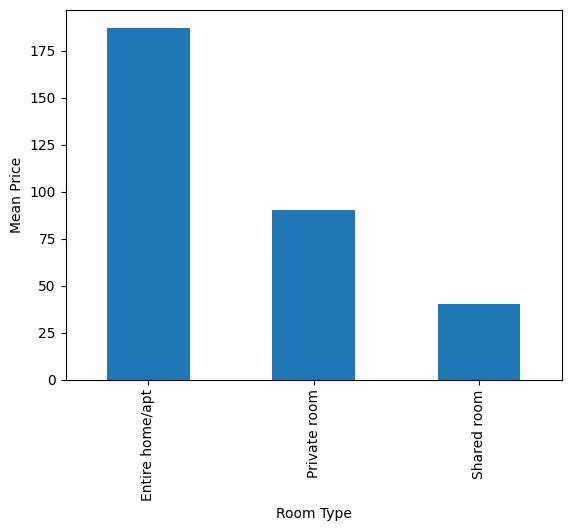

In [93]:
# Select top 200 rows
df = df.head(200)
# Group the DataFrame by neighbourhood_group
grouped = df.groupby('room_type')
# Plot a bar chart of the mean price for each neighbourhood_group
grouped['price'].mean().plot(kind='bar')
plt.xlabel('Room Type')
plt.ylabel('Mean Price')
plt.show()

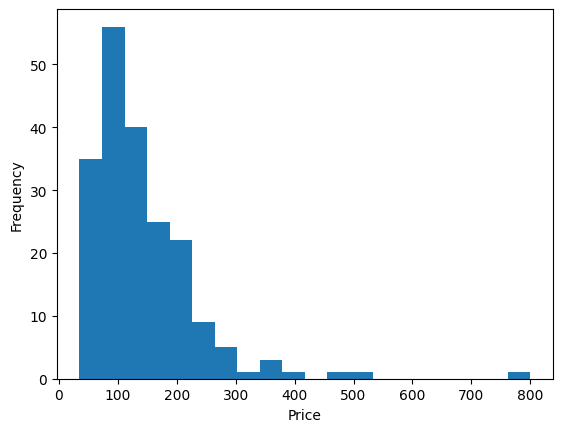

In [94]:
# Select top 200 rows
df = df.head(200)
# Plot a histogram of the price column
plt.hist(df['price'], bins=20)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

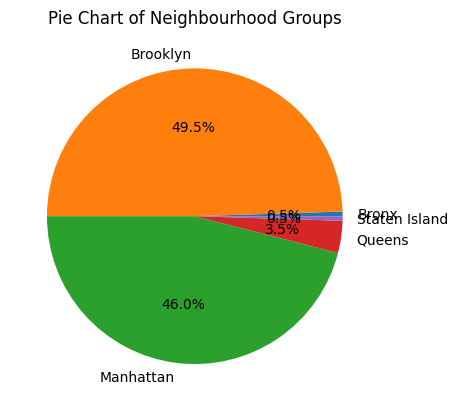

In [95]:
import matplotlib.pyplot as plt

# Group the data by neighbourhood_group and get the size of each group
grouped_data = df.groupby('neighbourhood_group').size()

# Create the pie chart
plt.pie(grouped_data.values, labels=grouped_data.index, autopct='%1.1f%%')
plt.title('Pie Chart of Neighbourhood Groups')

# Show the chart
plt.show()


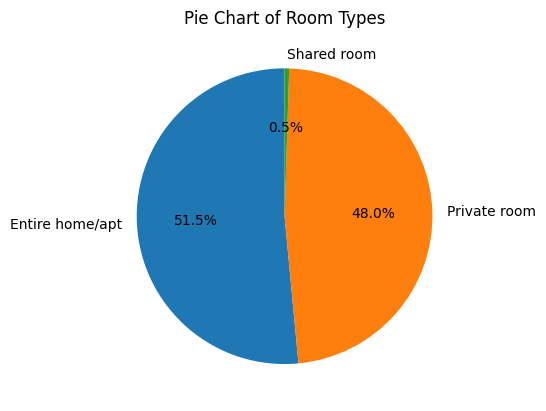

In [96]:
import matplotlib.pyplot as plt

room_type_counts = df['room_type'].value_counts()
labels = room_type_counts.index.tolist()
sizes = room_type_counts.values.tolist()

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.set_title('Pie Chart of Room Types')
plt.show()
